<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S8_C5_PLN_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Sirve para trabajar con textos en español
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 80.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# MiniReto: Agrupar las letras de las canciones por género

In [60]:
url  = "https://raw.githubusercontent.com/it-ces/Datasets/main/lyrics-label.txt"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyrics  208 non-null    object
 1   label   208 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [61]:
df['label'].unique()

array(['Vallenato', 'Ranchera'], dtype=object)

# Pruebas individuales

* Bajar Texto a minuscula
* Eliminar saltor de línea (\n)
* Eliminar conectores
* Eliminar palabras específicas (bis)

In [62]:
df['lyrics'][0]

'Oye morenita te vas a quedar muy sola\nporque anoche dijo el radio\nque abrieron el Liceo\nComo es estudiante\nya se va Escalona\npero de recuerdo te dejó un paseo (bis)\n\nQue te habla..."de aquel inmenso amor"\nQue llevo... "dentro del corazón"\ny dice..."todo lo que yo siento"\nque es pura..."pasión y sentimiento"\ncantando con el lenguaje grato\nque tiene la tierra ´e Pedro Castro (bis)\n\nAdiós morenita me voy por la madrugada\nno quiero que me llores\nporque me da dolor,\npaso por valencia\ncojo la sabana,\nCaracolicito y llegó a Fundación (bis)\n\nY entonces..."me tengo que meter"\nen un diablo..."al que le llaman tren"\nay, que sale..."por toá la zona pasa"\ny de tarde... "se mete a Santa Marta",\nque sale por to´a la zona pasa\ny de tarde se mete a Santa Marta (bis).\n\nEse orgullo que tú tienes no es muy bueno\nte juro que que más tarde te vas a arrepentir,\nyo sólo he querido dejarte un recuerdo\nporque en Santa Marta me puedo morir.\n\nY entonces... "me tienes que llorar"\

In [63]:
texto_prueba = " Liceo\nComo es estudiante\nya se va Escalona\npero de recuerdo te dejó un paseo (bis)\n\nQue te habla..."

In [64]:
import re
# elimina (bis) y (\n)

In [65]:
texto_minus = texto_prueba.lower() # .lower para hacer las letras minusculas
texto_procesado = re.sub('\n', ' ', texto_minus) # remplaza un salto de linea por un espacio
# Eliminar los espacios dobles
#texto_procesado = re.sub('\s+', ' ', texto_procesado)
texto_procesado = re.sub('  ', ' ', re.sub('\n', ' ', texto_minus))
texto_procesado = re.sub(r"\s*\(bis\)", '', texto_procesado)

texto_procesado

' liceo como es estudiante ya se va escalona pero de recuerdo te dejó un paseo que te habla...'

In [66]:
def pre_clean(texto_prueba):
  texto_minus = texto_prueba.lower() # .lower para hacer las letras minusculas
  texto_procesado = re.sub('\n', ' ', texto_minus) # remplaza un salto de linea por un espacio
  # Eliminar los espacios dobles
  #texto_procesado = re.sub('\s+', ' ', texto_procesado)
  texto_procesado = re.sub('  ', ' ', re.sub('\n', ' ', texto_minus))
  texto_procesado = re.sub(r"\s*\(bis\)", '', texto_procesado)
  return texto_procesado

In [67]:
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [68]:
nlp = spacy.load('es_core_news_sm')

In [69]:
def clean_text(text):
  text = nlp(text)
  text = ' '.join([token.lemma_ for token in text if not token.is_stop and not token.is_punct])
  return text


In [70]:
clean_text(texto_procesado)

'  liceo estudiante escalonar recuerdo paseo'

In [71]:
clean_text(texto_prueba)

'  Liceo \n estudiante \n Escalona \n recuerdo paseo bis \n\n'

In [72]:
df['lyrics'][0]

'Oye morenita te vas a quedar muy sola\nporque anoche dijo el radio\nque abrieron el Liceo\nComo es estudiante\nya se va Escalona\npero de recuerdo te dejó un paseo (bis)\n\nQue te habla..."de aquel inmenso amor"\nQue llevo... "dentro del corazón"\ny dice..."todo lo que yo siento"\nque es pura..."pasión y sentimiento"\ncantando con el lenguaje grato\nque tiene la tierra ´e Pedro Castro (bis)\n\nAdiós morenita me voy por la madrugada\nno quiero que me llores\nporque me da dolor,\npaso por valencia\ncojo la sabana,\nCaracolicito y llegó a Fundación (bis)\n\nY entonces..."me tengo que meter"\nen un diablo..."al que le llaman tren"\nay, que sale..."por toá la zona pasa"\ny de tarde... "se mete a Santa Marta",\nque sale por to´a la zona pasa\ny de tarde se mete a Santa Marta (bis).\n\nEse orgullo que tú tienes no es muy bueno\nte juro que que más tarde te vas a arrepentir,\nyo sólo he querido dejarte un recuerdo\nporque en Santa Marta me puedo morir.\n\nY entonces... "me tienes que llorar"\

In [73]:
texend = clean_text(df['lyrics'][0])
testores = pre_clean(texend)
testores

'oye morenitar ir quedar  anoche radio  abrir liceo  estudiante  escalona  recuerdo paseo bis  "de inmenso amor  llevar corazón  "todo sentir  puro "pasión sentimiento  cantar lenguaje grato  tierra ´ pedro castro bis  adiós morenita madrugada  querer llorser  dolor  paso valencia  cojo sabana  caracolicito fundación bis  "me meter  diablo "al llamar trar  ay salir "por toá zona pasar  meter santa marta  salir to´a zona pasar  meter santa marta bis  orgullo tener  jurar ir arrepentir  querer dejar tú recuerdo  santa marta morir  tener llorar  ñapa "te tener  traje negro gust  ir arrepentir  hiciste sufrir bis '

In [74]:
testores = pre_clean(df['lyrics'][0])
texend = clean_text(testores)
texend

'oir morenita ir quedar anoche radio abrir liceo estudiante escalonar recuerdo paseo "de inmenso amor llevar corazón "todo sentir puro "pasión sentimiento cantar lenguaje grato tierra ´ pedro castro adiós morenita madrugada querer llores dolor paso valencia cojo sabana caracolicito fundación "me meter diablo "al llamar trar ay salir "por toá zona pasar meter santa marta salir to´a zona pasar meter santa marta orgullo tener jurar ir arrepentir querer dejar tú recuerdo santa marta morir tener llorar ñapa "te tener traje negro gust ir arrepentir hiciste sufrir'

# PARTE 1. Limpieza de la columna 'lyrics'

In [ ]:
df['lyrics_clean'] = df['lyrics'].apply(lambda x: clean_text(pre_clean(x)))

In [80]:
df['lyrics'][53]

'Anhelos tengo de verte vida mía\nAnhelos de sentirte cerca de mí\nAnhelos de besarte noche y día\n\nY es que mi amor solo existe para ti\nTú fuiste la ilusión de un hombre joven\nSin experiencia en las reglas del amor\nQue como un tonto cayó bajo tus redes\nTendidas con engaño y con traición\n\nSi los anhelos se cumplen\nSe curarán las heridas\nDe un alma triste y sentida\nQue es por tu causa que sufre\n\nSi los anhelos se cumplen\nSe curarán las heridas\nDe un alma triste y sentida\nQue es por tu causa que sufre\n\nSi los anhelos se cumplen\nSe curarán las heridas\nDe un alma triste y sentida\nQue es por tu causa que sufre\n'

In [81]:
df['lyrics_clean'][53]


'anhelo verte vida anhelo sentirte cerca anhelo besarte noche amor fuistir ilusión hombre joven experiencia regla amor tonto caer red tendido engaño traición anhelo cumplir curar herida alma triste sentido causa sufrir anhelo cumplir curar herida alma triste sentido causa sufrir anhelo cumplir curar herida alma triste sentido causa sufrir'

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lyrics_clean']).toarray()

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

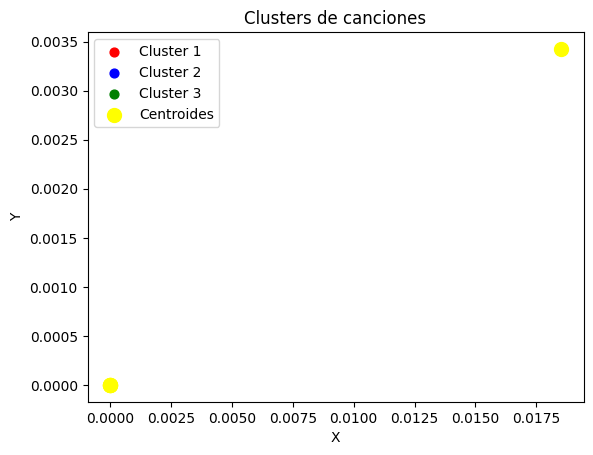

In [88]:
km = KMeans(n_clusters=5,
            init = 'random',
            n_init = 12,
            max_iter = 300,
            tol = 1e-04,
            random_state =(0) )
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 40, c = 'green', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroides')
plt.title('Clusters de canciones')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()